<a href="https://colab.research.google.com/github/GeorgeKonstantinosDimou/Deep-dive-ML/blob/main/Decision_Trees_%26_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingRegressor, StackingRegressor
from sklearn import tree
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error
from google.colab import drive

#1. Load Dataset & Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MSc Data and Web Science/Machine Learning/Exercise 2 & 3/water_potability.csv')
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


##Create Plots

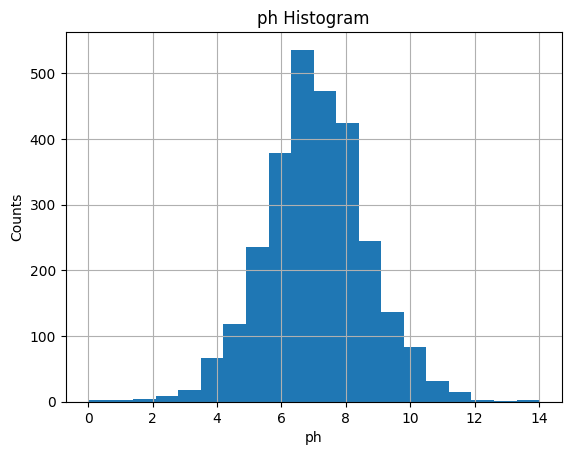

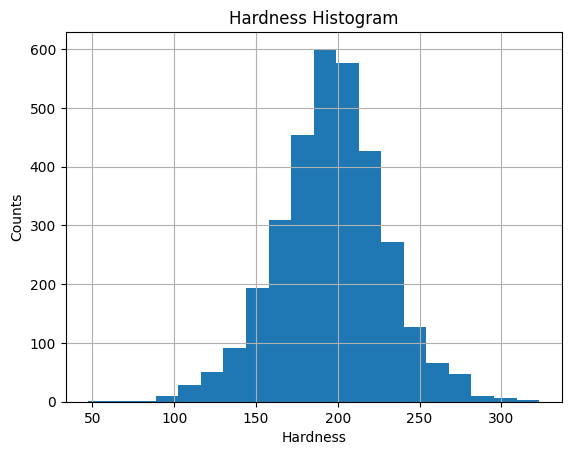

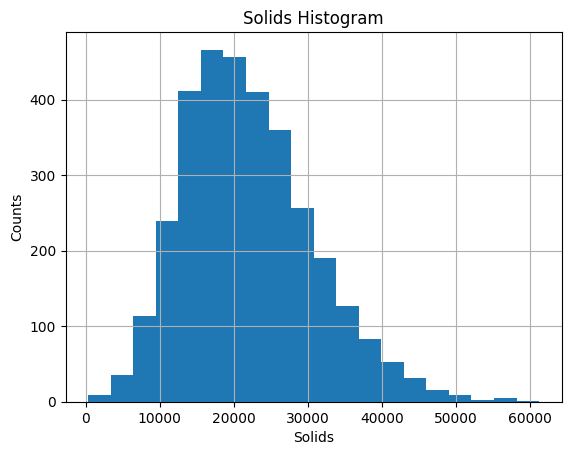

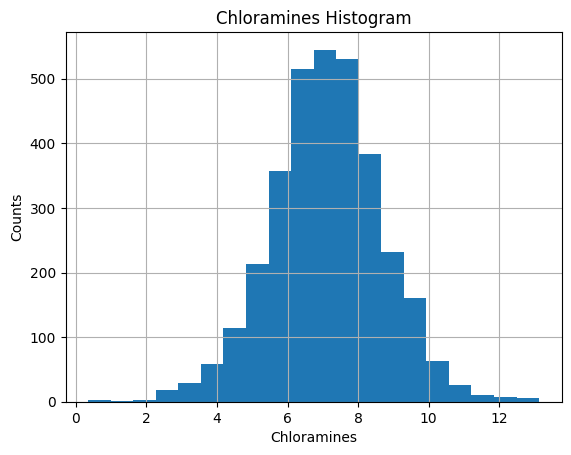

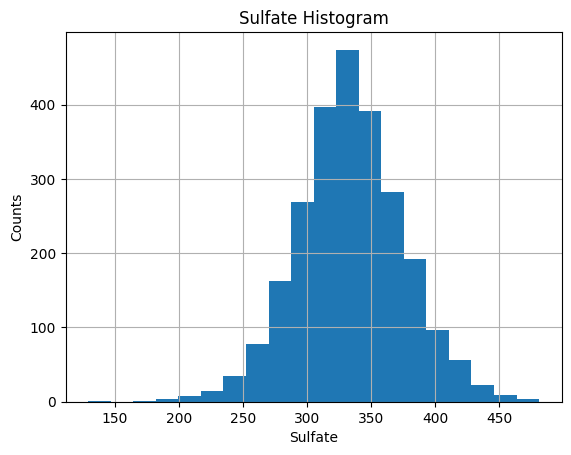

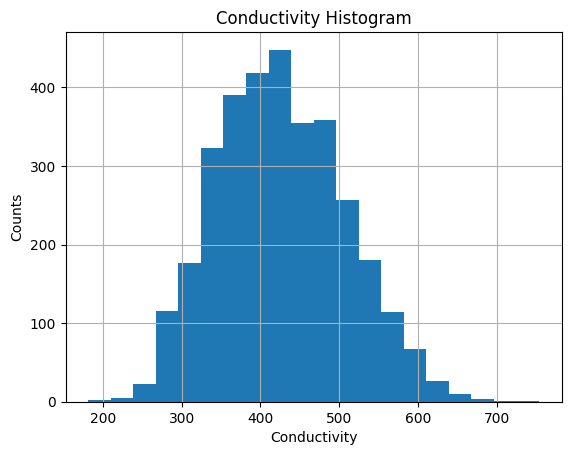

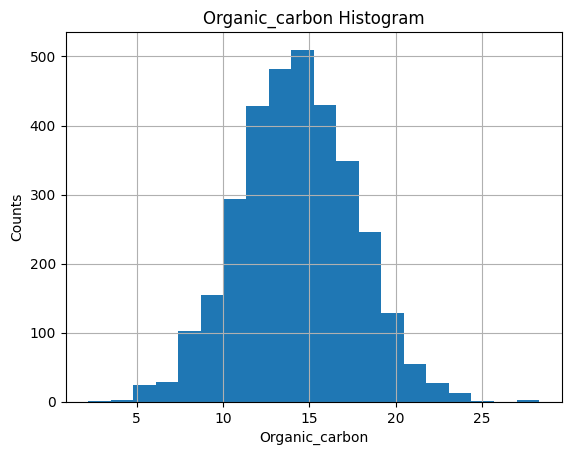

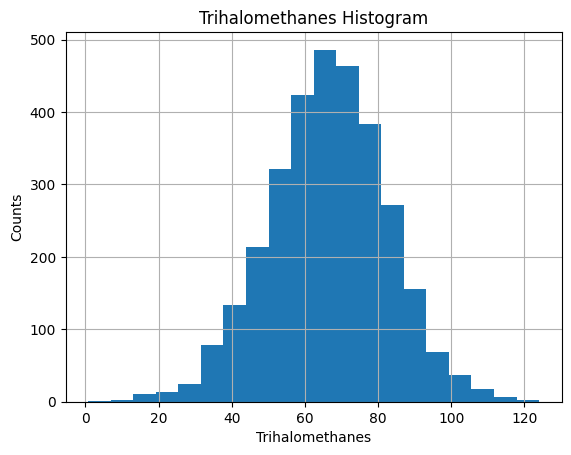

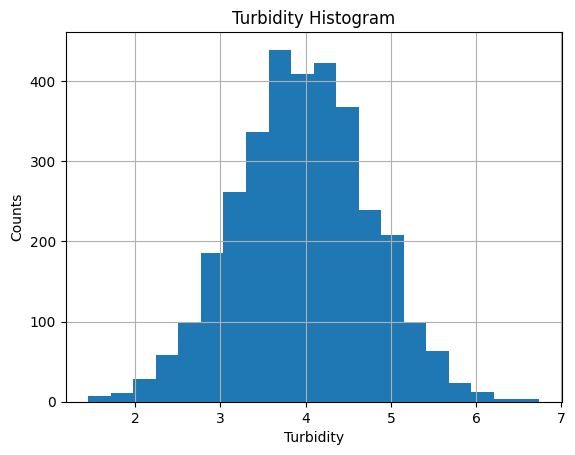

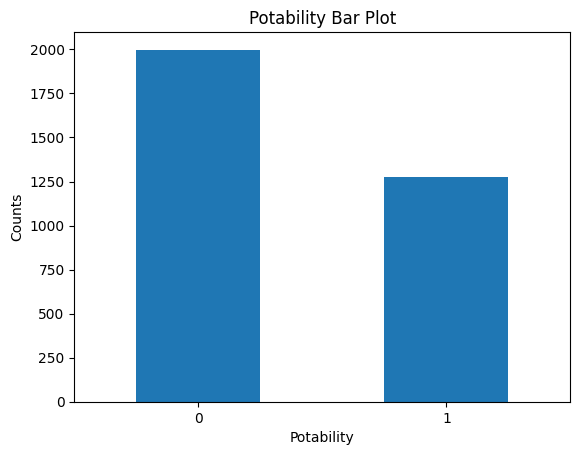

In [ ]:
#Print Histograms
df['ph'].hist(bins=20)
plt.title('ph Histogram')
plt.xlabel('ph')
plt.ylabel('Counts')
plt.show()
print('\n')

df['Hardness'].hist(bins=20)
plt.title('Hardness Histogram')
plt.xlabel('Hardness')
plt.ylabel('Counts')
plt.show()
print('\n')

df['Solids'].hist(bins=20)
plt.title('Solids Histogram')
plt.xlabel('Solids')
plt.ylabel('Counts')
plt.show()
print('\n')

df['Chloramines'].hist(bins=20)
plt.title('Chloramines Histogram')
plt.xlabel('Chloramines')
plt.ylabel('Counts')
plt.show()
print('\n')

df['Sulfate'].hist(bins=20)
plt.title('Sulfate Histogram')
plt.xlabel('Sulfate')
plt.ylabel('Counts')
plt.show()
print('\n')

df['Conductivity'].hist(bins=20)
plt.title('Conductivity Histogram')
plt.xlabel('Conductivity')
plt.ylabel('Counts')
plt.show()
print('\n')

df['Organic_carbon'].hist(bins=20)
plt.title('Organic_carbon Histogram')
plt.xlabel('Organic_carbon')
plt.ylabel('Counts')
plt.show()
print('\n')

df['Trihalomethanes'].hist(bins=20)
plt.title('Trihalomethanes Histogram')
plt.xlabel('Trihalomethanes')
plt.ylabel('Counts')
plt.show()
print('\n')

df['Turbidity'].hist(bins=20)
plt.title('Turbidity Histogram')
plt.xlabel('Turbidity')
plt.ylabel('Counts')
plt.show()
print('\n')

#For Outcome column display a bar plot
df['Potability'].value_counts().plot.bar()
plt.title('Potability Bar Plot')
plt.xlabel('Potability')
plt.xticks(rotation=0) #fix rotation of x axis
plt.ylabel('Counts')
plt.show()

##Missing Values & Percentage of potibility

In [ ]:
df.isna().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [ ]:
potable = df['Potability'].loc[df['Potability'] == 1].count()
potable_prc = potable/len(df)
print(f'Percentage of potable water is: {potable_prc}')
print(f'Percentage of non-potable water is: {1-potable_prc}')

Percentage of potable water is: 0.3901098901098901
Percentage of non-potable water is: 0.6098901098901099


The data quality of this dataset is questionable. This is due to many reasons:


1.   Various examples for many features (Solids, Sulfates, Chloramines) contain non-safe for drinking values. Many examples indicated as "potable" have increased values for those features.
2.   Most of the features are distributed normally, which in realistic scenarios is close to impossible to achieve.



# 2. Safe levels of ph

In [ ]:
import statistics

potable_ph_smaller_than = df['Potability'].loc[(df['Potability'] == 1) & (df['ph'] < 6.5) ].count()
potable_prc_smaller_than = potable_ph_smaller_than/len(df.loc[df['ph'] < 6.5])
print(f'Percentage of potable water with ph smaller than 6.5 is: {potable_prc_smaller_than}')
print(f'Percentage of non-potable water with ph smaller than 6.5 is: {1-potable_prc_smaller_than}\n')

potable_ph_between = df['Potability'].loc[(df['Potability'] == 1) & (df['ph'].between(6.5, 8.5))].count()
potable_prc_between = potable_ph_between/len(df.loc[df['ph'].between(6.5, 8.5)])
print(f'Percentage of potable water with ph between 6.5 and 8.5 is: {potable_prc_between}')
print(f'Percentage of non-potable water with ph between 6.5 and 8.5 is: {1-potable_prc_between}\n')

potable_ph_bigger_than = df['Potability'].loc[(df['Potability'] == 1) & (df['ph'] > 8.5)].count()
potable_prc_bigger_than = potable_ph_bigger_than/len(df.loc[df['ph'] > 8.5])
print(f'Percentage of potable water with ph bigger than 8.5 is: {potable_prc_bigger_than}')
print(f'Percentage of non-potable water with ph bigger than 8.5 is: {1-potable_prc_bigger_than}\n')

print(f'Average of potable water is: {(potable_prc_smaller_than+potable_prc_between+potable_prc_bigger_than)/3}')
print(f'The standard deviation of potable water is: {statistics.stdev([potable_prc_smaller_than,potable_prc_between,potable_prc_bigger_than])}')

Percentage of potable water with ph smaller than 6.5 is: 0.3677685950413223
Percentage of non-potable water with ph smaller than 6.5 is: 0.6322314049586777

Percentage of potable water with ph between 6.5 and 8.5 is: 0.43900602409638556
Percentage of non-potable water with ph between 6.5 and 8.5 is: 0.5609939759036144

Percentage of potable water with ph bigger than 8.5 is: 0.3312883435582822
Percentage of non-potable water with ph bigger than 8.5 is: 0.6687116564417178

Average of potable water is: 0.3793543208986634
The standard deviation of potable water is: 0.05478545845257042


As we can see the average of potable water is ~0.38. Both percentages of ph smaller than 6.5 and bigger than 8.5 have lower values than that. Standard deviation also shows us that we have a substantial differences from the average. WHO claim stands true to a certain amount

# 3. Safe levels of Chloramine

<Axes: xlabel='ph', ylabel='Chloramines'>

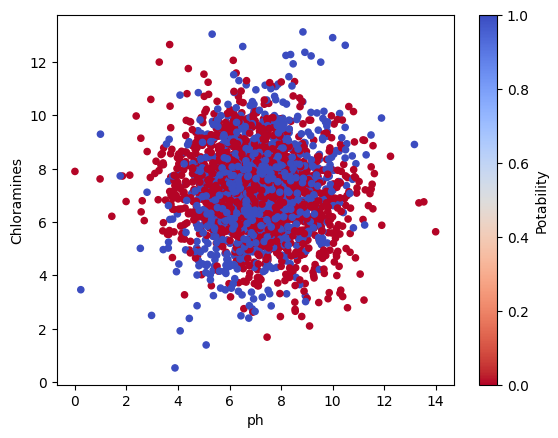

In [ ]:
df.plot.scatter(x='ph', y='Chloramines', c='Potability', colormap='coolwarm_r')

From the scatter plot we can see that there is a wide range of Chloramine values for each ph level. This means that the two features dont have a strong between them.

# Training & Testing

In [ ]:
x = df.drop(columns=['Potability']).to_numpy()
y = df['Potability'].to_numpy()

x.shape, y.shape

((3276, 9), (3276,))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2293, 9), (2293,), (983, 9), (983,))

In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_pred

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5879959308240081

## 6. Combinations testing

In [ ]:
from itertools import product


criteria = ['gini', 'entropy']
max_depths = [None, 3, 5]
min_samples_splits = [2, 5, 10]
min_samples_leaves = [1, 2]
max_features_options = [None, 'sqrt']
ccp_alphas = [0, 0.01]


results = []

for criterion, max_depth, min_samples_split, min_samples_leaf, max_features, ccp_alpha in product(
        criteria, max_depths, min_samples_splits, min_samples_leaves, max_features_options, ccp_alphas):

  clf = DecisionTreeClassifier(
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        ccp_alpha=ccp_alpha,
        random_state=0
    )

  clf.fit(x_train, y_train)
  y_pred_train = clf.predict(x_train)
  y_pred = clf.predict(x_test)

  # Calculate training and testing accuracy
  train_acc = accuracy_score(y_train, y_pred_train)
  test_acc = accuracy_score(y_test, y_pred)

  results.append({
        'criterion': criterion,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'max_features': max_features,
        'ccp_alpha': ccp_alpha,
        'train_acc': train_acc,
        'test_acc': test_acc
  })

df_result = pd.DataFrame(results)
df_result

,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,ccp_alpha,train_acc,test_acc
0,gini,NaN,2,1,None,0.00,0.998692,0.567650
1,gini,NaN,2,1,None,0.01,0.605321,0.620549
2,gini,NaN,2,1,sqrt,0.00,0.994767,0.552391
3,gini,NaN,2,1,sqrt,0.01,0.605321,0.620549
4,gini,NaN,2,2,None,0.00,0.951156,0.585961
...,...,...,...,...,...,...,...,...
139,entropy,5.0,10,1,sqrt,0.01,0.620148,0.626653
140,entropy,5.0,10,2,None,0.00,0.665940,0.655137
141,entropy,5.0,10,2,None,0.01,0.620148,0.626653
142,entropy,5.0,10,2,sqrt,0.00,0.644134,0.625636


# 7. Best model for max depth = 3 for visualization

[Text(0.5, 0.875, 'x[4] <= 259.026\nentropy = 0.968\nsamples = 2293\nvalue = [1388, 905]'),
 Text(0.25, 0.625, 'x[2] <= 21161.408\nentropy = 0.771\nsamples = 62\nvalue = [14, 48]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[0] <= 6.674\nentropy = 0.982\nsamples = 19\nvalue = [11, 8]'),
 Text(0.0625, 0.125, 'entropy = 0.65\nsamples = 12\nvalue = [10, 2]'),
 Text(0.1875, 0.125, 'entropy = 0.592\nsamples = 7\nvalue = [1, 6]'),
 Text(0.375, 0.375, 'x[1] <= 220.901\nentropy = 0.365\nsamples = 43\nvalue = [3, 40]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 27\nvalue = [0, 27]'),
 Text(0.4375, 0.125, 'entropy = 0.696\nsamples = 16\nvalue = [3, 13]'),
 Text(0.75, 0.625, 'x[4] <= 387.328\nentropy = 0.961\nsamples = 2231\nvalue = [1374, 857]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[0] <= 4.636\nentropy = 0.952\nsamples = 2068\nvalue = [1300, 768]'),
 Text(0.5625, 0.125, 'entropy = 0.71\nsamples = 98\nvalue = [79, 19]'),
 Text(0.6875, 0.125, 'entropy = 0.958\nsamp

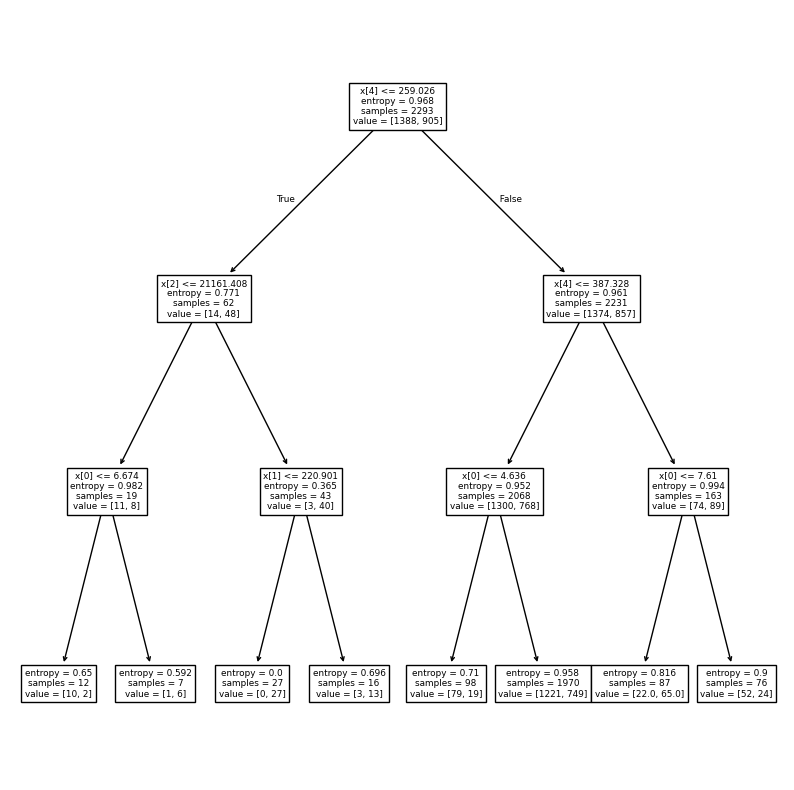

In [ ]:
#get the largest accuracy
hyperparameters = df_result.loc[df_result['max_depth'] == 3].nlargest(1, 'test_acc').values.tolist()

model = DecisionTreeClassifier(criterion=hyperparameters[0][0], max_depth=int(hyperparameters[0][1]),
                               min_samples_split=hyperparameters[0][2], min_samples_leaf = hyperparameters[0][3],
                               max_features = hyperparameters[0][4], ccp_alpha = hyperparameters[0][5])
model.fit(x_train, y_train)
plt.figure(figsize = (10,10))
tree.plot_tree(model)
# y_pred = model.predict(x_test)
# y_pred

Interpretations:

1.  This node checks if the value in feature x[4] (Sulfate) is less than or equal to 259.026 to decide the split. If True (<= 259.026), the samples go to the left child node; if False (> 259.026), they go to the right child node.
  1.  [Left Subtree] For samples where x[4] <= 259.026, the tree further splits on x[2] (Solids). If x[2] <= 21161.408, it goes to the next level of nodes.
    *   [Left Leaf Nodes] For samples where x[4] <= 259.026 and x[2] <= 21161.408, we split on x[0] (ph). If x[0] <= 6.674, it goes to two leaf nodes
        1.   [Left Leaf Nodes] Among these 12 samples, 10 belong to class 0 and 2 to class 1, indicating high purity.
        2.   [Right Leaf Node] This node has mostly samples from class 1 (6 out of 7), suggesting that x[0] > 6.674 in this branch corresponds mostly to class 1.

    *   [Right Leaf Nodes] For samples where x[4] <= 259.026 and x[2] > 21161.408, we split on x[1] (Hardness). If x[1] <= 220.901, they go to two more leaf nodes  
        1.    [Left Leaf Node] All samples here belong to class 1, indicating a pure split.
        2.    [Right Leaf Node] This split is mostly class 1 (13 out of 16 samples), with a few class 0 samples.

  2. [Right Subtree] For samples where x[4] > 259.026, we split further on x[4] <= 387.328. This results in two branches.

    *   [Left Branch Node] For samples where x[4] > 259.026 and x[4] <= 387.328, the tree splits on x[0] <= 4.636.
        1.   [Left Leaf Node] Mostly class 0 samples (79 out of 98) are in this leaf.
        2.   [Right Leaf Node]  This node is a bit mixed, with a higher proportion of class 0 (1221 out of 1970 samples) but also a significant number of class 1 samples.
        
    *   [Right Leaf Node] For samples where x[4] > 259.026 and x[4] > 387.328, the tree further splits on x[0] <= 7.61.
        1.   [Left Leaf Node] Mostly class 1 samples are in this node (65 out of 87).
        2.   [Right Leaf Node] Mostly class 0 samples (52 out of 76) are in this node.








# 8. Best model & feature importance

In [ ]:
hyperparameters_general = df_result[df_result['test_acc'] == df_result['test_acc'].max()].values.tolist()
# hyperparameters_general

model_general = DecisionTreeClassifier(criterion=hyperparameters_general[0][0], max_depth=int(hyperparameters_general[0][1]),
                               min_samples_split=hyperparameters_general[0][2], min_samples_leaf = hyperparameters_general[0][3],
                               max_features = hyperparameters_general[0][4], ccp_alpha = hyperparameters_general[0][5])

model_general.fit(x_train, y_train)
y_pred = model.predict(x_test)

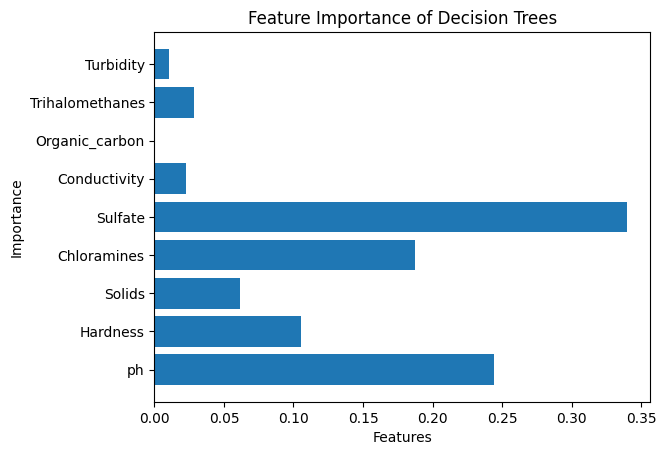

In [ ]:
#Recreate it because it is a numpy array
x = df.drop(columns=['Potability'])

features = x.columns
feature_importance = model_general.feature_importances_

plt.barh(x.columns, feature_importance)
plt.title('Feature Importance of Decision Trees')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

From what we can see in the plot we can safely assume that the 5 most importance features are Sulfate, ph, Chloramines, Hardness, Solids in that specific order.

9. Typically a Random Forest performs better than a single Decision Tree because:
*   It combines decisions from multiple DTs which help with overfitting.
*   It used random feautures (Feature bagging). This ensures that the forest doesnt rely heavily on a specific set of features.

# 10. Random Forest

In [ ]:
criteria = ['gini', 'entropy']
max_depths = [None, 3, 5]
min_samples_splits = [2, 5, 10]
min_samples_leaves = [1, 2]
max_features_options = [None, 'sqrt']
ccp_alphas = [0, 0.01]
n_estimat = [50, 100, 200]


results = []

for criterion, max_depth, min_samples_split, min_samples_leaf, max_features, ccp_alpha, n_estimator in product(
        criteria, max_depths, min_samples_splits, min_samples_leaves, max_features_options, ccp_alphas, n_estimat):

  clf = RandomForestClassifier(
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        ccp_alpha=ccp_alpha,
        n_estimators=n_estimator,
        random_state=0
    )

  clf.fit(x_train, y_train)
  y_pred_test = clf.predict(x_train)
  y_pred = clf.predict(x_test)

  # Calculate training and testing accuracy
  train_acc = accuracy_score(y_train, y_pred_test)
  test_acc = accuracy_score(y_test, y_pred)

  results.append({
        'criterion': criterion,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'max_features': max_features,
        'ccp_alpha': ccp_alpha,
        'n_estimators': n_estimator,
        'train_acc': train_acc,
        'test_acc': test_acc
  })

df_result = pd.DataFrame(results)
df_result

,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,ccp_alpha,n_estimators,train_acc,test_acc
0,gini,NaN,2,1,None,0.00,50,1.000000,0.665310
1,gini,NaN,2,1,None,0.00,100,1.000000,0.665310
2,gini,NaN,2,1,None,0.00,200,1.000000,0.678535
3,gini,NaN,2,1,None,0.01,50,0.619712,0.626653
4,gini,NaN,2,1,None,0.01,100,0.619712,0.626653
...,...,...,...,...,...,...,...,...,...
427,entropy,5.0,10,2,sqrt,0.00,100,0.680768,0.653103
428,entropy,5.0,10,2,sqrt,0.00,200,0.684693,0.651068
429,entropy,5.0,10,2,sqrt,0.01,50,0.622329,0.628688
430,entropy,5.0,10,2,sqrt,0.01,100,0.621893,0.628688


11. In our specific application, accurately predicting non-potable water is more important than correctly identifying potable water. This is because failing to identify non-potable water could pose severe health risks to the recipients of the water analyzed. For that reason, the prediction of False Positives is far more important than the prediction of Fals Negatives.

# 12. Best RF Model & feature importance

In [ ]:
#Problem with max_depth column; is interpreted as number and returns NaN instead of None
df_result = df_result.replace({np.nan: None})
hyperparameters_general = df_result[df_result['test_acc'] == df_result['test_acc'].max()].values.tolist()

model_general = DecisionTreeClassifier(criterion=hyperparameters_general[0][0], max_depth=hyperparameters_general[0][1],
                               min_samples_split=hyperparameters_general[0][2], min_samples_leaf = hyperparameters_general[0][3],
                               max_features = hyperparameters_general[0][4], ccp_alpha = hyperparameters_general[0][5])

model_general.fit(x_train, y_train)
y_pred = model.predict(x_test)

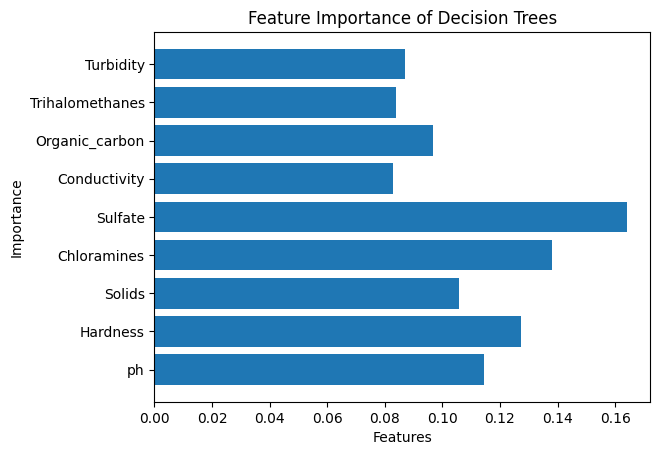

In [ ]:
feature_importance = model_general.feature_importances_

plt.barh(x.columns, feature_importance)
plt.title('Feature Importance of Decision Trees')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

12. The most important features as we can see from the plot are in order: Sulfates, Hardness, Chloramines, Solids, ph. Even though they are the same features which the Decisition Tree used they are not in the same order or magnitute. This is due to the nature of the Random Forest which utilizes not only multiple trees, but different partitions of the original dataset features, thus giving somewhat more "distributed" respect to all other features as well.

13. From a legal safety, Random Forest is the better choice. Its superior accuracy, consistency, and reliability make it less prone to mistakes that a  Decision Tree would make. They are the better choice when it comes to matters of public health.



---



# Ensemble Methods

In [ ]:
import yfinance as yf

ticker_symbol = 'DX-Y.NYB'
ticker = yf.Ticker(ticker_symbol)
df = ticker.history(period='5y').reset_index(drop=False)

df.drop(columns=['Volume', 'Dividends', 'Stock Splits'], inplace=True)

df

,Date,Open,High,Low,Close
0,2019-11-06 00:00:00-05:00,97.940002,97.980003,97.779999,97.949997
1,2019-11-07 00:00:00-05:00,97.949997,98.230003,97.820000,98.139999
2,2019-11-08 00:00:00-05:00,98.139999,98.400002,98.099998,98.349998
3,2019-11-11 00:00:00-05:00,98.370003,98.379997,98.129997,98.199997
4,2019-11-12 00:00:00-05:00,98.209999,98.419998,98.209999,98.309998
...,...,...,...,...,...
1254,2024-10-31 00:00:00-04:00,104.089996,104.220001,103.820000,103.980003
1255,2024-11-01 00:00:00-04:00,103.860001,104.349998,103.680000,104.279999
1256,2024-11-04 00:00:00-05:00,103.970001,103.970001,103.580002,103.889999
1257,2024-11-05 00:00:00-05:00,103.910004,103.959999,103.370003,103.419998


# 1. Visualizations

In [ ]:
import plotly.express as px

fig = px.line(df, x="Date", y=["Open", 'High', 'Low', 'Close'], title='Opening and Closing values for Dollar in 2019-2024')
fig.show()

# 2-5. Explanations

2. From the plot we can safely assume that our time-series is non-stationary. This is evident by the change of its statistical properties, such as mean or variance. In general financial stock-prices are non-stationary.

3. In October a signifficant rise (more than 2%) in DXY index can be seen. This is a move on the so called "safe-haven" currencies which include the Swiss franc and Japanese yen [[1]](https://www.marketplace.org/2024/10/09/whats-behind-the-rising-value-of-the-u-s-dollar/). This can be mainly attributed on the war between Israel and Iran which leads to a distruption on global oil supplies.

[1] What’s behind the rising value of the U.S. dollar? https://www.marketplace.org/2024/10/09/whats-behind-the-rising-value-of-the-u-s-dollar/

4. Predicting dollar's close value using Open, High, Low, and Close values might be possible with a very complex model but almost always would result in sub-optimal accuracy of predictions [[2]](https://quant.stackexchange.com/questions/21351/building-predictive-model-for-closing-price-using-only-previous-days-data) [[3]](https://www.reddit.com/r/algotrading/comments/n5msz6/predicting_if_closing_price_for_next_day_will_go/). That is due to the numerous factors which influence those prices such global economic indicators and geopolitical events.

  Limiting our available data to one day would also hinder our ability of using historical data and being able to capture trends, seasonality, and momentum effects.

  For those prementioned reasons, I think its possible to find a function which could predict the close value but with not very accurate predictions.

[2] Building predictive model for closing price using only previous days data https://quant.stackexchange.com/questions/21351/building-predictive-model-for-closing-price-using-only-previous-days-data

[3] Predicting if closing price for next day will go down, stay, or rise (only) using closing price data for previous days? My hot take: predicting this just based on the given data it's almost as throwing a coin, in terms of reliability. https://www.reddit.com/r/algotrading/comments/n5msz6/predicting_if_closing_price_for_next_day_will_go/

5. Splitting data randomly doesnt offer us anything for train and test datasets. Timeseries forecasting would benefit with "rear" data from our dataset for our test set and everything else for our train set [[5]](https://towardsdatascience.com/time-series-from-scratch-train-test-splits-and-evaluation-metrics-4fd654de1b37), [[6]](https://stats.stackexchange.com/questions/117350/how-to-split-dataset-for-time-series-prediction).

[5] Time Series From Scratch — Train/Test Splits and Evaluation Metrics https://towardsdatascience.com/time-series-from-scratch-train-test-splits-and-evaluation-metrics-4fd654de1b37

[6] How to split dataset for time-series prediction? https://stats.stackexchange.com/questions/117350/how-to-split-dataset-for-time-series-prediction

# 6-10. Preprocessing, Training & Evaluations on multiple models

In [ ]:
df_train = df.loc[df['Date'].dt.year < 2024].drop('Date', axis=1)
df_test = df.loc[df['Date'].dt.year == 2024].drop('Date', axis=1)

df_train.iloc[-10:], df_test.head()

(            Open        High         Low       Close
 1034  102.099998  102.639999  101.839996  102.550003
 1035  102.589996  102.629997  102.379997  102.510002
 1036  102.470001  102.629997  102.070000  102.169998
 1037  102.190002  102.540001  102.160004  102.410004
 1038  102.389999  102.449997  101.739998  101.839996
 1039  101.760002  101.900002  101.430000  101.699997
 1040  101.650002  101.769997  101.449997  101.470001
 1041  101.550003  101.570000  100.830002  100.989998
 1042  100.870003  101.300003  100.620003  101.230003
 1043  101.199997  101.419998  101.070000  101.330002,
             Open        High         Low       Close
 1044  101.419998  102.250000  101.339996  102.199997
 1045  102.150002  102.730003  102.080002  102.459999
 1046  102.459999  102.529999  102.150002  102.419998
 1047  102.400002  103.099998  101.910004  102.410004
 1048  102.440002  102.620003  102.080002  102.209999)

In [ ]:
from pandas import DataFrame
from numpy import ndarray

# print(df_train.iloc[0:0+4])
# print(df_train.iloc[0+4+1]['Close'])

# def TimeSeriesSplit(df: DataFrame, n: int)-> ndarray:
#   inputs = np.zeros(shape=(len(df),df.shape[1]))
#   targets = np.zeros(shape=(len(df)))
#   for i in range(0,len(df)+1):
#     #If remaining length is smaller than n we dont need those lines
#     if len(df) - i <= n: break

#     inputs[i:i+n,:] = df.iloc[i:i+n]
#     targets[i] = df.iloc[i+n]['Close']

#   inputs = inputs[~np.all(inputs == 0, axis=1)]
#   targets = targets[targets != 0]
#   #Trim it so they can have the same size
#   inputs = inputs[:len(targets)]
#   return inputs, targets

def TimeSeriesSplit(df: DataFrame, n: int)-> ndarray:
  inputs = np.zeros(shape=(len(df),n,df.shape[1]))
  targets = np.zeros(shape=(len(df)))
  for i in range(0,len(df)+1):
    #If remaining length is smaller than n we dont need those lines
    if len(df) - i <= n: break

    inputs[i] = df.iloc[i:i+n]
    targets[i] = df.iloc[i+n]['Close']

  targets = targets[targets != 0]
  #Trim it so they can have the same size
  inputs = inputs[:len(targets)]
  return inputs, targets

8. In general the size of the window (size of Timeframe) depends on the size of the sample and periodicty of the data. Using shorter windows for data collected in shorter intervals and larger windowss for data collected in larger intervals is ideal [[7]](https://www.mathworks.com/help/econ/rolling-window-estimation-of-state-space-models.html). Also we need to

  When trying to predict the next day, typically smaller windows is ideal to capture recent trends and older observations could include noise to our data.

  When trying to predict the next month, larger windows is often more ideal because it helps us capture seasonality and periodic trends.

  [7] Rolling-Window Analysis of Time-Series Models https://www.mathworks.com/help/econ/rolling-window-estimation-of-state-space-models.html

In [ ]:
n = 5
x_train, y_train = TimeSeriesSplit(df_train,n)
print(f'Sizes (train) before reshaping: {x_train.shape, y_train.shape}')

x_test, y_test = TimeSeriesSplit(df_test,n)
print(f'Sizes (test) before reshaping: {x_test.shape, y_test.shape}')

x_train = np.reshape(x_train, newshape=(len(x_train), n*df_train.shape[1]))
x_test = np.reshape(x_test, newshape=(len(x_test), n*df_test.shape[1]))

print(f'Sizes (train) after reshaping: {x_train.shape, y_train.shape}')
print(f'Sizes (test) after reshaping: {x_test.shape, y_test.shape}')

Sizes (train) before reshaping: ((1039, 5, 4), (1039,))
Sizes (test) before reshaping: ((210, 5, 4), (210,))
Sizes (train) after reshaping: ((1039, 20), (1039,))
Sizes (test) after reshaping: ((210, 20), (210,))


In [ ]:
def train_test_plot(x_train, y_train, x_test, y_test):
  estimators = [
      ('LR', LinearRegression())
  ]

  models = [
      ('Linear Regression', LinearRegression()),
      ('Random Forest', RandomForestRegressor()),
      ('Bagging Regressor', BaggingRegressor()),
      ('XGBoost', XGBRegressor()),
      ('Stacking Regressor', StackingRegressor(estimators=estimators))
  ]

  results = []

  for name, model in models:
    spcf_model = model
    spcf_model.fit(x_train, y_train)

    y_pred = spcf_model.predict(x_test)
    y_pred_train = spcf_model.predict(x_train)

    MAE_train = mean_absolute_error(y_train, y_pred_train)
    MAE_test = mean_absolute_error(y_test, y_pred)

    #Append results in dictionary
    results.append({
        'Model': name,
        'MAE_train': MAE_train,
        'MAE_test': MAE_test
    })

  df_results = pd.DataFrame(results)
  df_results.set_index('Model', inplace=True)

  ax = df_results[['MAE_train', 'MAE_test']].plot(kind='bar', title ="MAEs per algorithm", figsize=(15, 10), legend=True, fontsize=10, color=['blue', 'green'])
  ax.set_xlabel("MAE", fontsize=10)
  plt.xticks(rotation=0)
  ax.set_ylabel("Score", fontsize=10)
  plt.show()

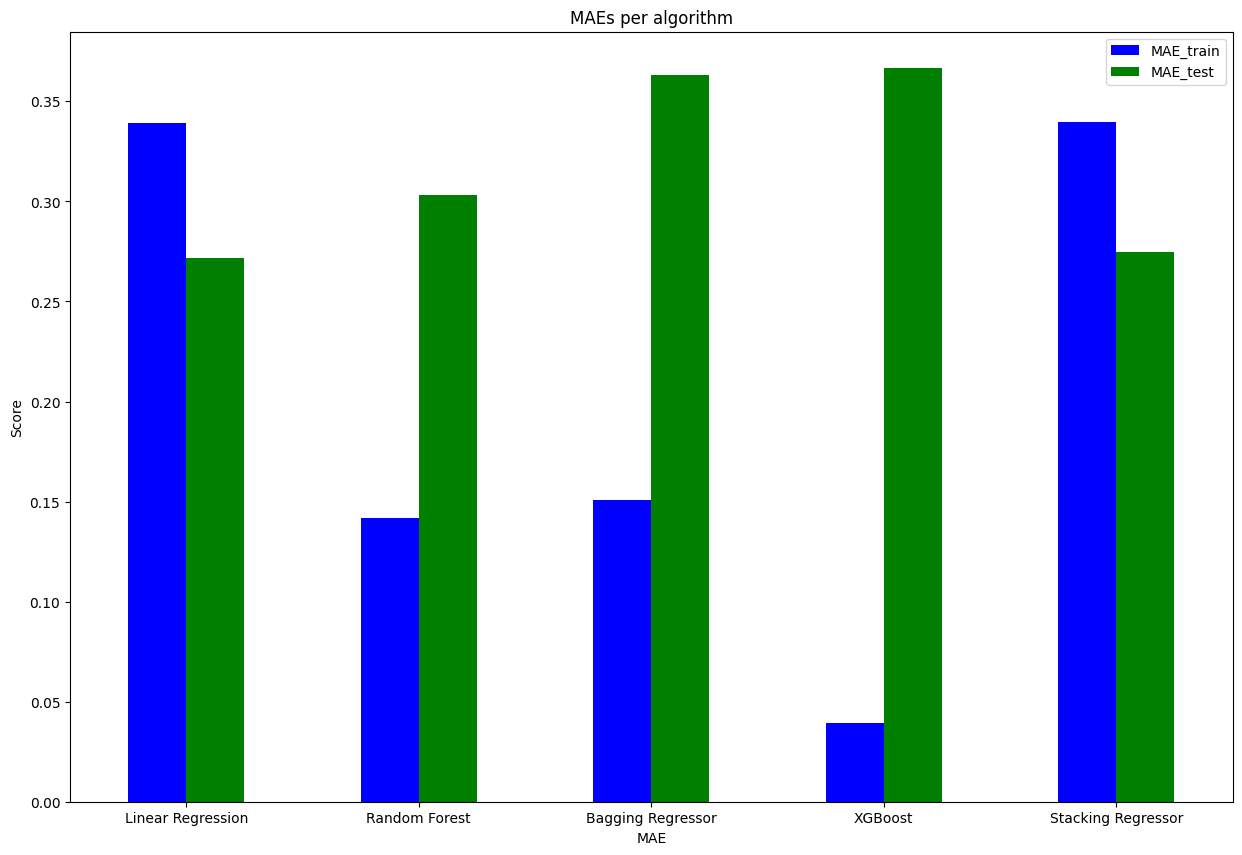

In [ ]:
train_test_plot(x_train, y_train, x_test, y_test)

10. Explanations:

  1. Linear Regression: Fits a straight line that minimizes the difference between predicted and actual values by finding the best-fitting coefficients for a linear equation.

  2. Random Forest Regressor: Combines predictions from multiple decision trees, built on random subsets of data and features, to improve accuracy and reduce overfitting.

  3. Bagging Regressor: Averages predictions from multiple instances of the same model, each trained on random samples of the data, to increase accuracy.

  4. XGBoost Regressor: An optimized, gradient-boosted ensemble model that sequentially builds trees to minimize errors, with techniques to prevent overfitting and speed up training.

  5. Stacking Regressor: Combines predictions from multiple base models (e.g., linear regression) by training a meta-model on their outputs to improve overall predictive performance.

# 11-13. Improvements on models & Retraing

In [ ]:
df_train['Month'] = df['Date'].apply(lambda x: (x.month-1)/11)
df_test['Month'] = df['Date'].apply(lambda x: (x.month-1)/11)

df_train.iloc[-5:], df_test.head()

(            Open        High         Low       Close  Month
 1039  101.760002  101.900002  101.430000  101.699997    1.0
 1040  101.650002  101.769997  101.449997  101.470001    1.0
 1041  101.550003  101.570000  100.830002  100.989998    1.0
 1042  100.870003  101.300003  100.620003  101.230003    1.0
 1043  101.199997  101.419998  101.070000  101.330002    1.0,
             Open        High         Low       Close  Month
 1044  101.419998  102.250000  101.339996  102.199997    0.0
 1045  102.150002  102.730003  102.080002  102.459999    0.0
 1046  102.459999  102.529999  102.150002  102.419998    0.0
 1047  102.400002  103.099998  101.910004  102.410004    0.0
 1048  102.440002  102.620003  102.080002  102.209999    0.0)

Adding a month column can make it easier for my model to recognize and use seasonal patterns.

In [ ]:
def Log_returns(df: DataFrame):
  for col in ['Open', 'High', 'Low', 'Close']:
        if col in df.columns:
            df[f'{col}'] = np.log(df[col].shift(1)) - np.log(df[col])
  df.dropna(how='any', inplace=True)

Log_returns(df_train)
Log_returns(df_test)

df_test.head(), df_train.head()

(          Open      High       Low     Close  Month
 1045 -0.007172 -0.004683 -0.007276 -0.002541    0.0
 1046 -0.003030  0.001949 -0.000685  0.000390    0.0
 1047  0.000586 -0.005544  0.002352  0.000098    0.0
 1048 -0.000391  0.004667 -0.001667  0.001955    0.0
 1049  0.002150 -0.000390 -0.000294 -0.003516    0.0,
        Open      High       Low     Close     Month
 1 -0.000102 -0.002548 -0.000409 -0.001938  0.909091
 2 -0.001938 -0.001729 -0.002858 -0.002138  0.909091
 3 -0.002341  0.000203 -0.000306  0.001526  0.909091
 4  0.001628 -0.000407 -0.000815 -0.001120  0.909091
 5 -0.001221 -0.000305 -0.000814 -0.000610  0.909091)

---------------------------------------------------------------------------------------------------------
Plots for train set


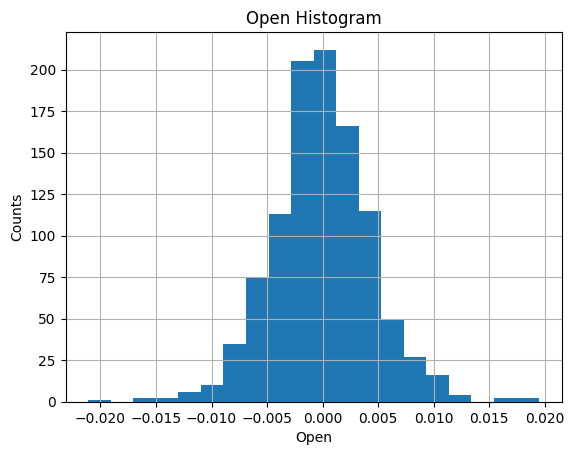

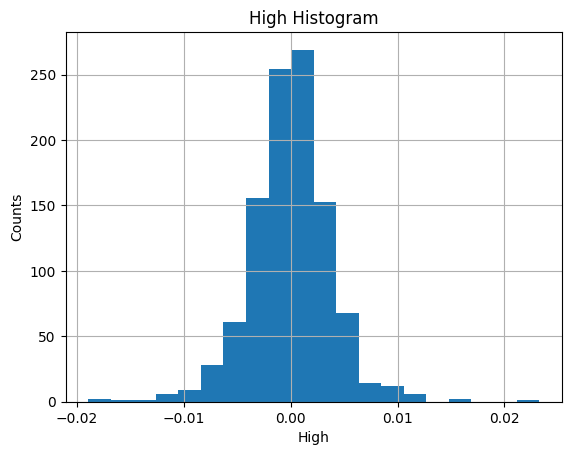

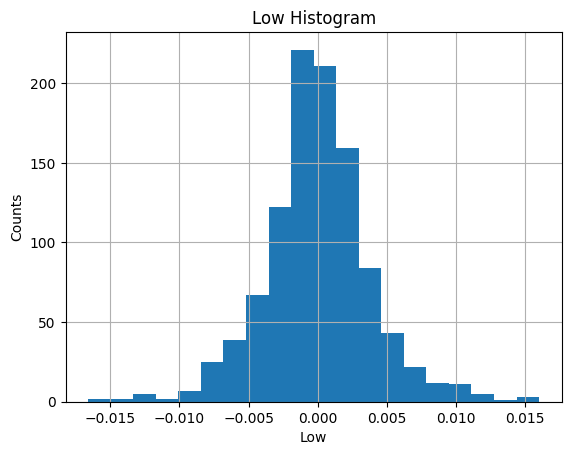

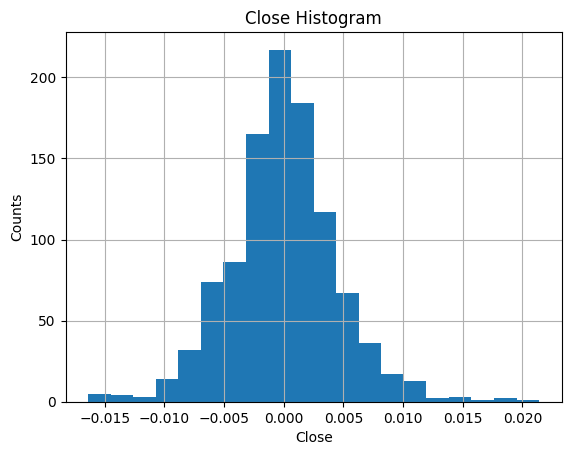

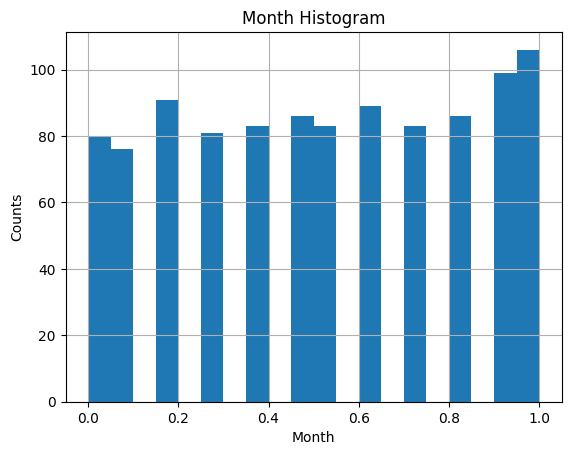



---------------------------------------------------------------------------------------------------------
Plots for test set


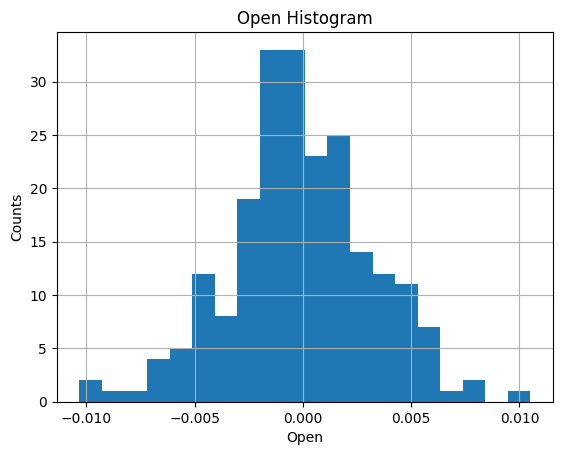

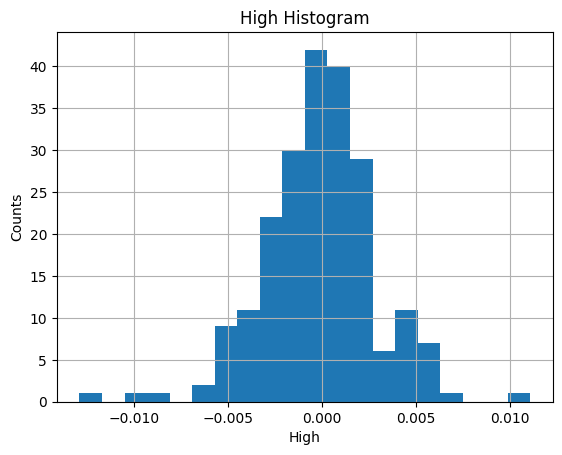

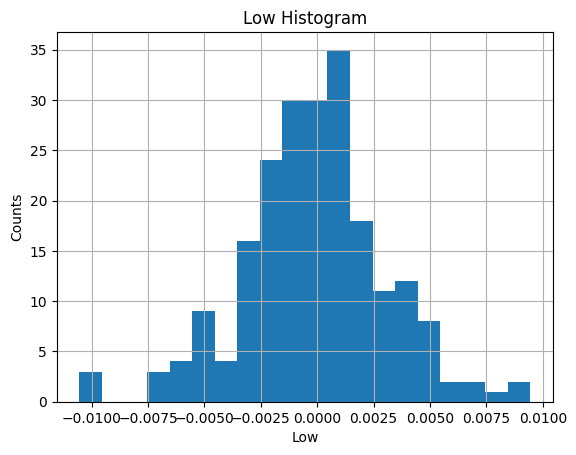

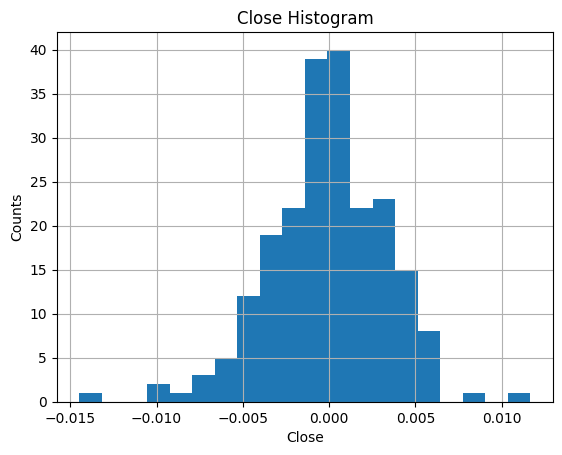

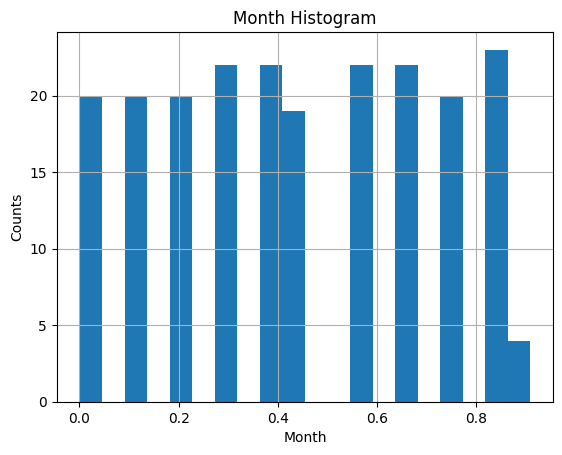

In [ ]:
#Print Histograms
def plot_hist(df: DataFrame, train: bool):
  print('---------------------------------------------------------------------------------------------------------')
  print('Plots for train set') if train else print(f'Plots for test set')
  for column in df.columns:
    df[column].hist(bins=20)
    plt.title(f'{column} Histogram')
    plt.xlabel(f'{column}')
    plt.ylabel('Counts')
    plt.show()
    print('\n')

plot_hist(df_train, True)
plot_hist(df_test, False)

c. Calculating Log returns helps termendously on Financial modeling. That is for multiple of reasons:

1.   Is an additive property. If I want log return for a period of time I can simply add those values together in contrast to traditional percentages.
2.   For small price changes, log returns are close to regular percentage returns, so they’re a good approximation.



d. This means that the model predicted that Close value will have an increase of 1% tommorow. The price of Ct+1 will be 0.9595$.

Sizes (train) before reshaping: ((1028, 5, 5), (1028,))
Sizes (test) before reshaping: ((205, 5, 5), (205,))
Sizes (train) after reshaping: ((1028, 25), (1028,))
Sizes (test) after reshaping: ((205, 25), (205,))


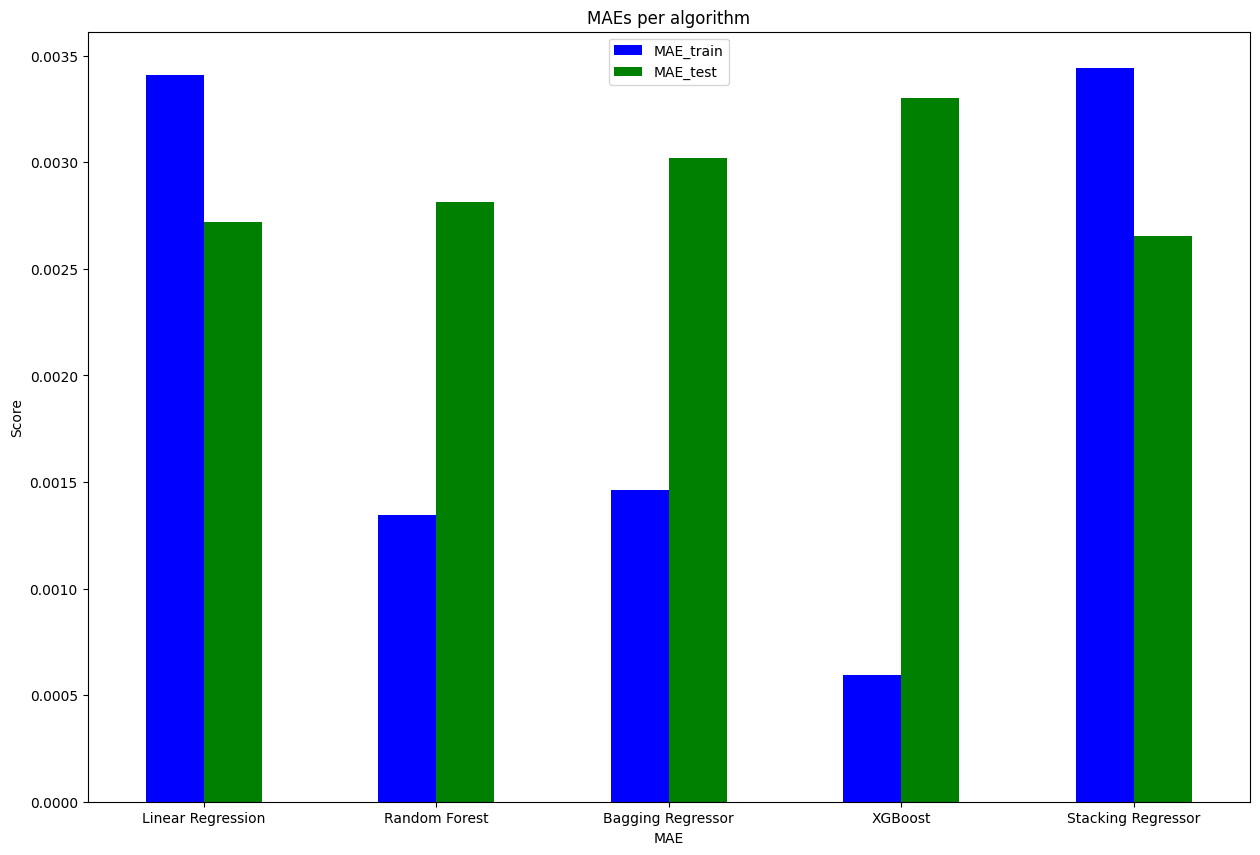

In [ ]:
#Repeat the same process
n = 5
x_train, y_train = TimeSeriesSplit(df_train,n)
print(f'Sizes (train) before reshaping: {x_train.shape, y_train.shape}')

x_test, y_test = TimeSeriesSplit(df_test,n)
print(f'Sizes (test) before reshaping: {x_test.shape, y_test.shape}')

x_train = np.reshape(x_train, newshape=(len(x_train), n*df_train.shape[1]))
x_test = np.reshape(x_test, newshape=(len(x_test), n*df_test.shape[1]))

print(f'Sizes (train) after reshaping: {x_train.shape, y_train.shape}')
print(f'Sizes (test) after reshaping: {x_test.shape, y_test.shape}')

In [ ]:
train_test_plot(x_train, y_train, x_test, y_test)

In [ ]:
lasso_model =